In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd
from pathlib import Path
import os
from datetime import date, datetime
import numpy as np

## Data Load

In [2]:
data_gdp = pd.read_csv(
    Path(os.getcwd()) / "data" / "macro_quarterly.csv", 
    sep=";", decimal=",", date_format="%d.%m.%Y", parse_dates=["yearquarter"], na_values=".")
data_gdp = data_gdp.loc[~data_gdp["GDP_nominal_mln_PLN_current_prices"].isna(), :].reset_index(drop=True)
data_gdp = data_gdp.set_index("yearquarter")

## Plotting

In [4]:
constr_cols = ["GDP_nominal_mln_PLN_current_prices", "construction_sector_added_value_nominal_mln_PLN_current_prices"]
constr_data = data_gdp.loc[:, constr_cols]
constr_data = constr_data.rename(columns=dict(zip(constr_cols, ["GDP", "constr"])))
constr_data = constr_data.groupby(pd.Grouper(freq="YE"))[["GDP", "constr"]].sum()
constr_data = constr_data.assign(share=lambda x: 100* x["constr"] / x["GDP"])
constr_data.index = constr_data.index.year

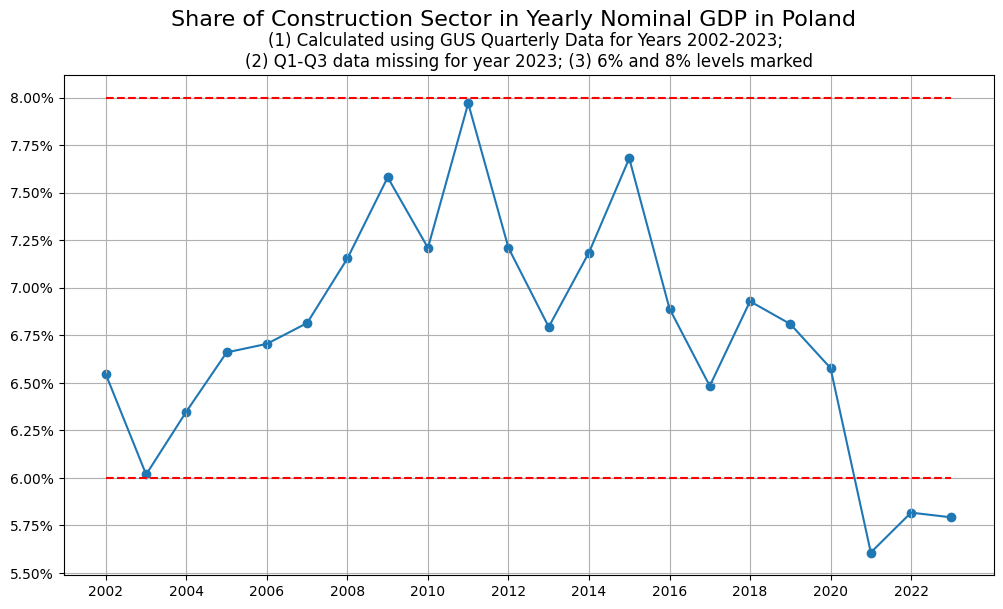

In [5]:
fig_constr = plt.figure(figsize=(12, 6.5))
ax = fig_constr.add_subplot(1, 1, 1)
ax.plot(constr_data.index, constr_data.share)
ax.scatter(constr_data.index, constr_data.share)
fig_constr.suptitle("Share of Construction Sector in Yearly Nominal GDP in Poland", size=16)
ax.set_title("(1) Calculated using GUS Quarterly Data for Years 2002-2023; \n(2) Q1-Q3 data missing for year 2023; (3) 6% and 8% levels marked")
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_xticks(range(2002, 2024, 2))
ax.set_yticks(np.arange(5.5, 8.25, 0.25))
ax.hlines(6, 2002, 2023, color="red", linestyle="--")
ax.hlines(8, 2002, 2023, color="red", linestyle="--")
ax.grid()